In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(
    style='darkgrid',
    font_scale=1.1
)

In [146]:
games = pd.read_csv('games.csv')

In [147]:
games = games.dropna(axis=0,how='any')

In [148]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.


Text(0.5, 1.0, 'График распределения количества выпущенных игр по годам')

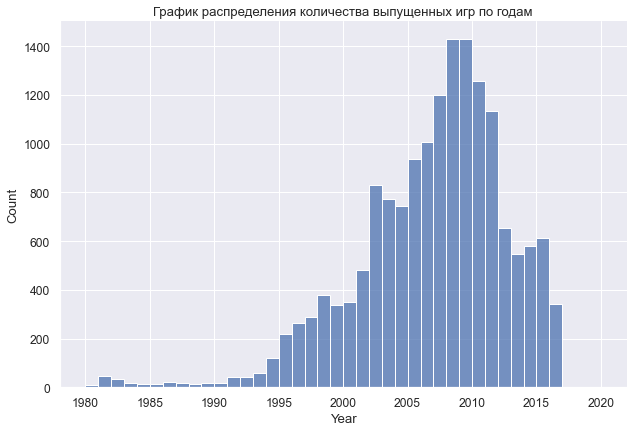

In [149]:
sns.displot(data=games, x='Year', height=6, aspect=1.5, bins=40) 
plt.title('График распределения количества выпущенных игр по годам')

In [150]:
games.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [151]:
games.Year.mode()

0    2009.0
Name: Year, dtype: float64

## На каких платформах произошло больше всего релизов?


In [152]:
top_release_platmorm = games \
    .groupby('Platform', as_index=False) \
    .agg({'Year':'count'}) \
    .rename(columns={'Year':'count_release'}) \
    .sort_values('count_release', ascending=False)

In [153]:
top_release_platmorm['per'] = (top_release_platmorm.count_release / games.shape[0]) 

In [154]:
top_release_platmorm.head()

,Platform,count_release,per
4,DS,2131,0.130808
16,PS2,2127,0.130563
17,PS3,1304,0.080044
26,Wii,1290,0.079185
28,X360,1234,0.075747


## Игры каких издателей (Publisher) встречаются в датасете чаще всего?

In [155]:
games \
    .groupby('Publisher', as_index=False) \
    .agg({'NA_Sales':'count'}) \
    .rename(columns={'NA_Sales':'count'}) \
    .sort_values('count', ascending=False)

,Publisher,count
138,Electronic Arts,1339
21,Activision,966
347,Namco Bandai Games,928
524,Ubisoft,918
275,Konami Digital Entertainment,823
...,...,...
149,Ertain,1
147,Epic Games,1
447,Seventh Chord,1
145,Enjoy Gaming ltd.,1


## В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other). 

In [156]:
games \
    .groupby('Publisher', as_index=False) \
    .agg({'NA_Sales':'median', 
          'EU_Sales':'median', 
          'JP_Sales':'median', 
          'Other_Sales':'median'}) \
    .query('Publisher == "Nintendo"')

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
359,Nintendo,0.375,0.12,0.28,0.03


In [157]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.

In [165]:
sales_in_JP = games \
    .query('Publisher == "Nintendo"') \
    .groupby(['Publisher', 'Genre'], as_index=False) \
    .agg({'JP_Sales': ['mean', 'median']}) \
    .rename(columns={'JP_Sales':'mean'}) 
sales_in_JP

Publisher         Genre      mean       
                                mean median
0   Nintendo        Action  0.373846  0.170
1   Nintendo     Adventure  0.257429  0.090
2   Nintendo      Fighting  0.830000  0.500
3   Nintendo          Misc  0.552500  0.250
4   Nintendo      Platform  0.922162  0.540
5   Nintendo        Puzzle  0.501216  0.255
6   Nintendo        Racing  0.789730  0.340
7   Nintendo  Role-Playing  0.970952  0.360
8   Nintendo       Shooter  0.251250  0.130
9   Nintendo    Simulation  0.844643  0.390
10  Nintendo        Sports  0.652182  0.250
11  Nintendo      Strategy  0.337419  0.190

In [167]:
nintendo_in_JP = games[['Publisher','Genre', 'JP_Sales']] \
    .query('Publisher == "Nintendo"')

<AxesSubplot:xlabel='Genre', ylabel='JP_Sales'>

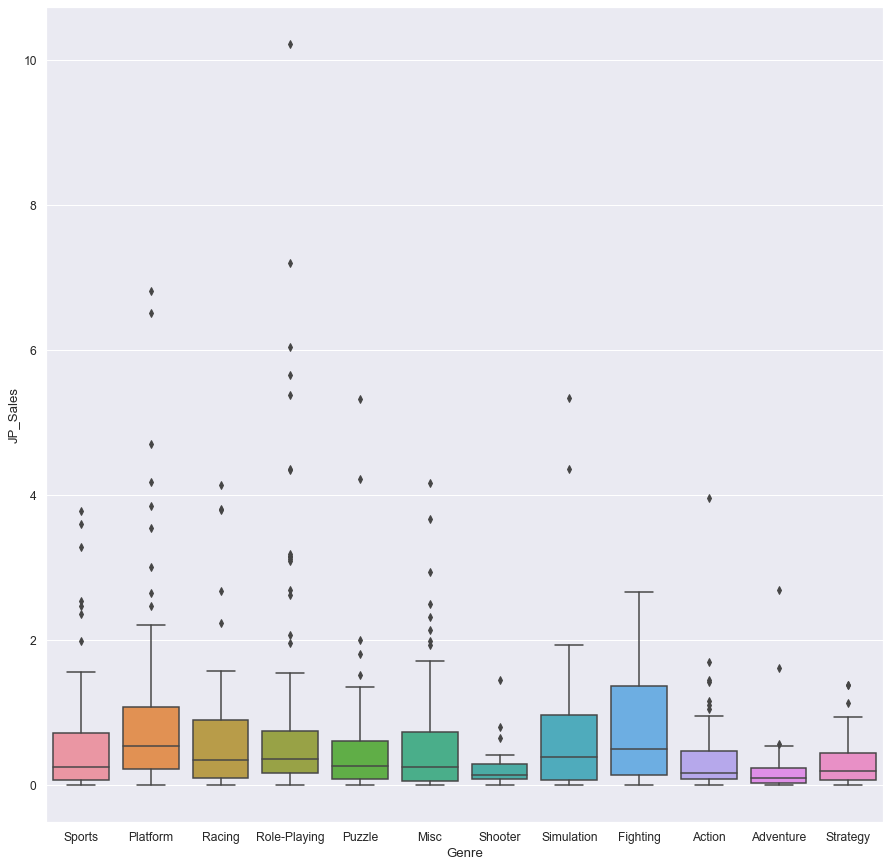

In [180]:
plt.figure(figsize=(15,15))
sns.boxplot(data=nintendo_in_JP, x ='Genre', y='JP_Sales')

## Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?

In [190]:
nintendo_genre_sales_by_year = games \
    .query('Publisher == "Nintendo"') \
    .groupby(['Year','Genre'], as_index=False) \
    .agg({'Global_Sales':'sum'}) \
    .rename(columns={'Global_Sales':'Total_sum'}) \
    .query('Genre in ["Fighting", "Simulation", "Platform", "Racing", "Sports"]')

In [191]:
nintendo_genre_sales_by_year

,Year,Genre,Total_sum
1,1983.0,Platform,5.62
2,1983.0,Sports,3.20
6,1984.0,Racing,5.68
8,1984.0,Sports,6.18
10,1985.0,Platform,43.17
...,...,...,...
247,2014.0,Sports,0.88
250,2015.0,Platform,5.24
254,2015.0,Simulation,2.98
255,2015.0,Sports,0.45


<AxesSubplot:xlabel='Year', ylabel='Total_sum'>

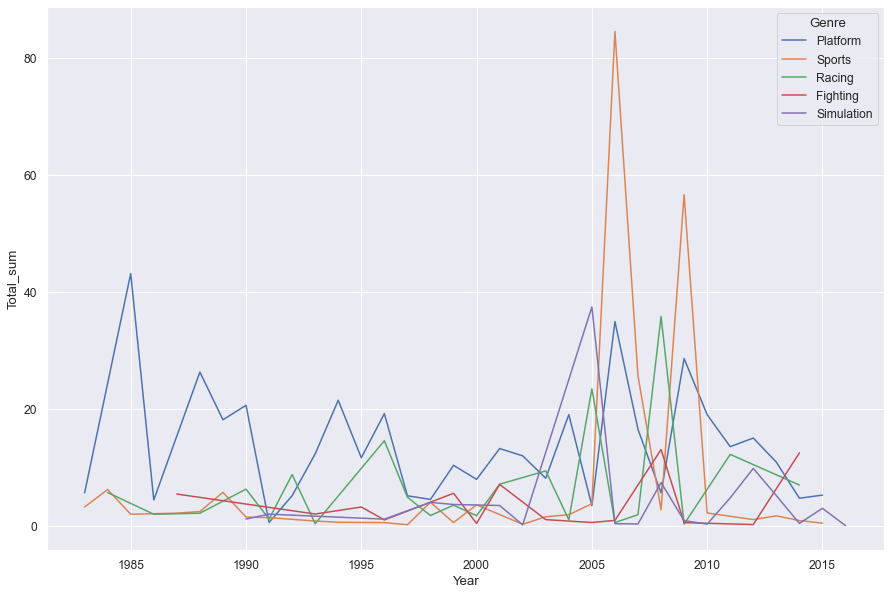

In [200]:
plt.figure(figsize=(15,10))
sns.lineplot(data=nintendo_genre_sales_by_year, x='Year', y='Total_sum', hue='Genre')